Work with the CodeProjectAI object detection API (YOLO). Note that by default, the minimum confidence for detected objects is 0.45

In [10]:
import codeprojectai.core as cpai
from PIL import Image, ImageDraw
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

IP = 'localhost'
PORT = '32168'
TIMEOUT = 20 # Default is 10
MIN_CONFIDENCE = 0.01 # Default is 0.45

cpaiobject = cpai.CodeProjectAIObject(ip=IP, port=PORT, timeout=TIMEOUT, min_confidence=MIN_CONFIDENCE)

#image_path = 'tests/images/test-image3.jpg'
#im = Image.open(image_path)
#plt.imshow(im);

%%time
try:
    with open(image_path, 'rb') as image_bytes:
        predictions = cpaiobject.detect(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)


## Object detection
Run with (in Windows): 
```
docker run --name CodeProject.AI-Server -d -p 32168:32168 ^
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\data,target=/etc/codeproject/ai ^\n
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\modules,target=/app/modules ^\n
  codeproject/ai-server"\n"
```
See [docs](https://www.codeproject.com/ai/docs/why/running_in_docker.html) for Linux and macOS instructions

Perform object detection - can be slow

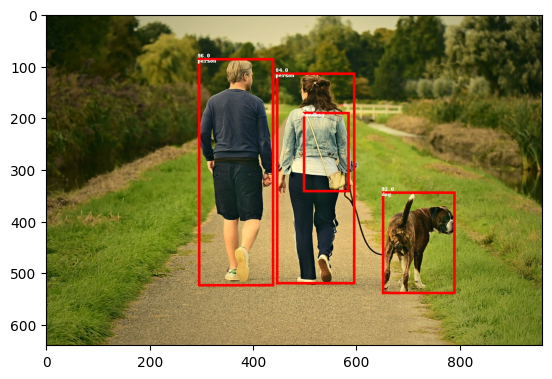

In [13]:
#predictions
#print(object)

 # Draw each bounding box that was returned by the AI engine
draw = ImageDraw.Draw(im)
for object in predictions:
    label = object["label"]
    conf  = object["confidence"]
    y_max = int(object["y_max"])
    y_min = int(object["y_min"])
    x_max = int(object["x_max"])
    x_min = int(object["x_min"])

    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=5)
    draw.text((x_min, y_min), f"{label}")
    draw.text((x_min, y_min - 10), f"{round(conf*100.0,0)}")

plt.imshow(im);

## Helper functions
The package provides helper functions for extracting info out of CodeProject.AI predictions

Get the set objects

In [8]:
cpai.get_objects(predictions)

['dog', 'handbag', 'person']

Get a summary of the number of occurances of objects

In [9]:
summary = cpai.get_objects_summary(predictions)
summary

{'dog': 1, 'handbag': 1, 'person': 2}

Get a list of confidences for a single object type, e.g. `person`

In [10]:
person_confidences = cpai.get_object_confidences(predictions, 'person')
person_confidences

[0.844304621219635, 0.959113597869873]

Get the list of confidences above some threshold value, useful for counting

In [11]:
CONFIDENCE_THRESHOLD = 0.9
len(cpai.get_confidences_above_threshold(person_confidences, CONFIDENCE_THRESHOLD))

1

## Custom model
CodeProject.AI Server comes with custom models. We'll use ipcam-general

In [11]:
mask_model = cpai.CodeProjectAIObject(IP, PORT, TIMEOUT, custom_model='ipcam-general')

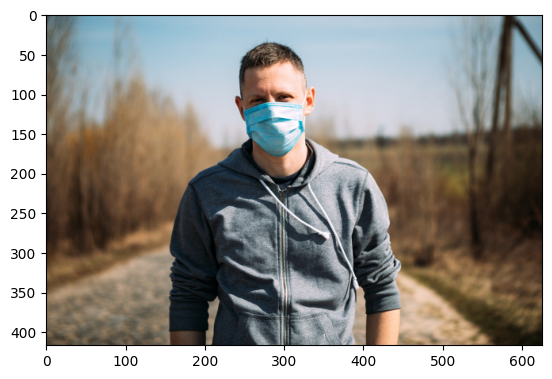

In [26]:
image_path = 'tests/images/masked.jpg'

im = Image.open(image_path)
plt.imshow(im);

In [13]:
%%time
try:
    with open(image_path, 'rb') as image_bytes:
        predictions = mask_model.detect(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)

CPU times: total: 0 ns
Wall time: 351 ms


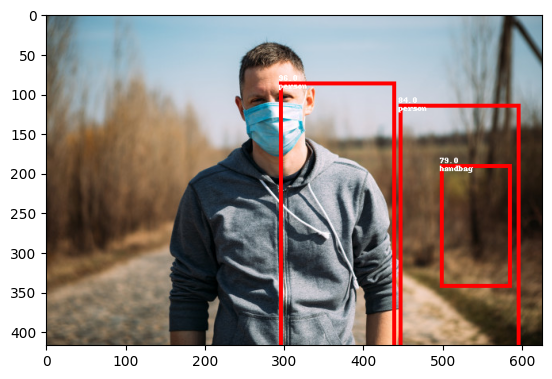

In [28]:
#predictions
#print(object)

 # Draw each bounding box that was returned by the AI engine
draw = ImageDraw.Draw(im)
for object in predictions:
    label = object["label"]
    conf  = object["confidence"]
    y_max = int(object["y_max"])
    y_min = int(object["y_min"])
    x_max = int(object["x_max"])
    x_min = int(object["x_min"])

    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=5)
    draw.text((x_min, y_min), f"{label}")
    draw.text((x_min, y_min - 10), f"{round(conf*100.0,0)}")

plt.imshow(im);

